In [1]:
from pymicrostructure.markets.continuous import ContinuousDoubleAuction
from pymicrostructure.traders.noise import *
from pymicrostructure.traders.market_maker import *
from pymicrostructure.traders.informed import *
from pymicrostructure.traders.ensemble import ensemble_traders
from pymicrostructure.visualization.summary import participant_comparison, price_path
from pymicrostructure.metrics.trader import *
from pymicrostructure.metrics.market import *
from pymicrostructure.markets.continuous import ContinuousDoubleAuction
from pymicrostructure.traders.strategy import *
from functools import partial
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
market = ContinuousDoubleAuction(initial_fair_price=1000)

market_maker = AdaptiveMarketMaker(market, 'AdaptiveMM')
noise = NoiseTrader(market, submission_rate=1, volume_size=np.random.randint(5, 55))

In [3]:
market.run(500)

100%|██████████| 500/500 [00:00<00:00, 20976.76it/s]


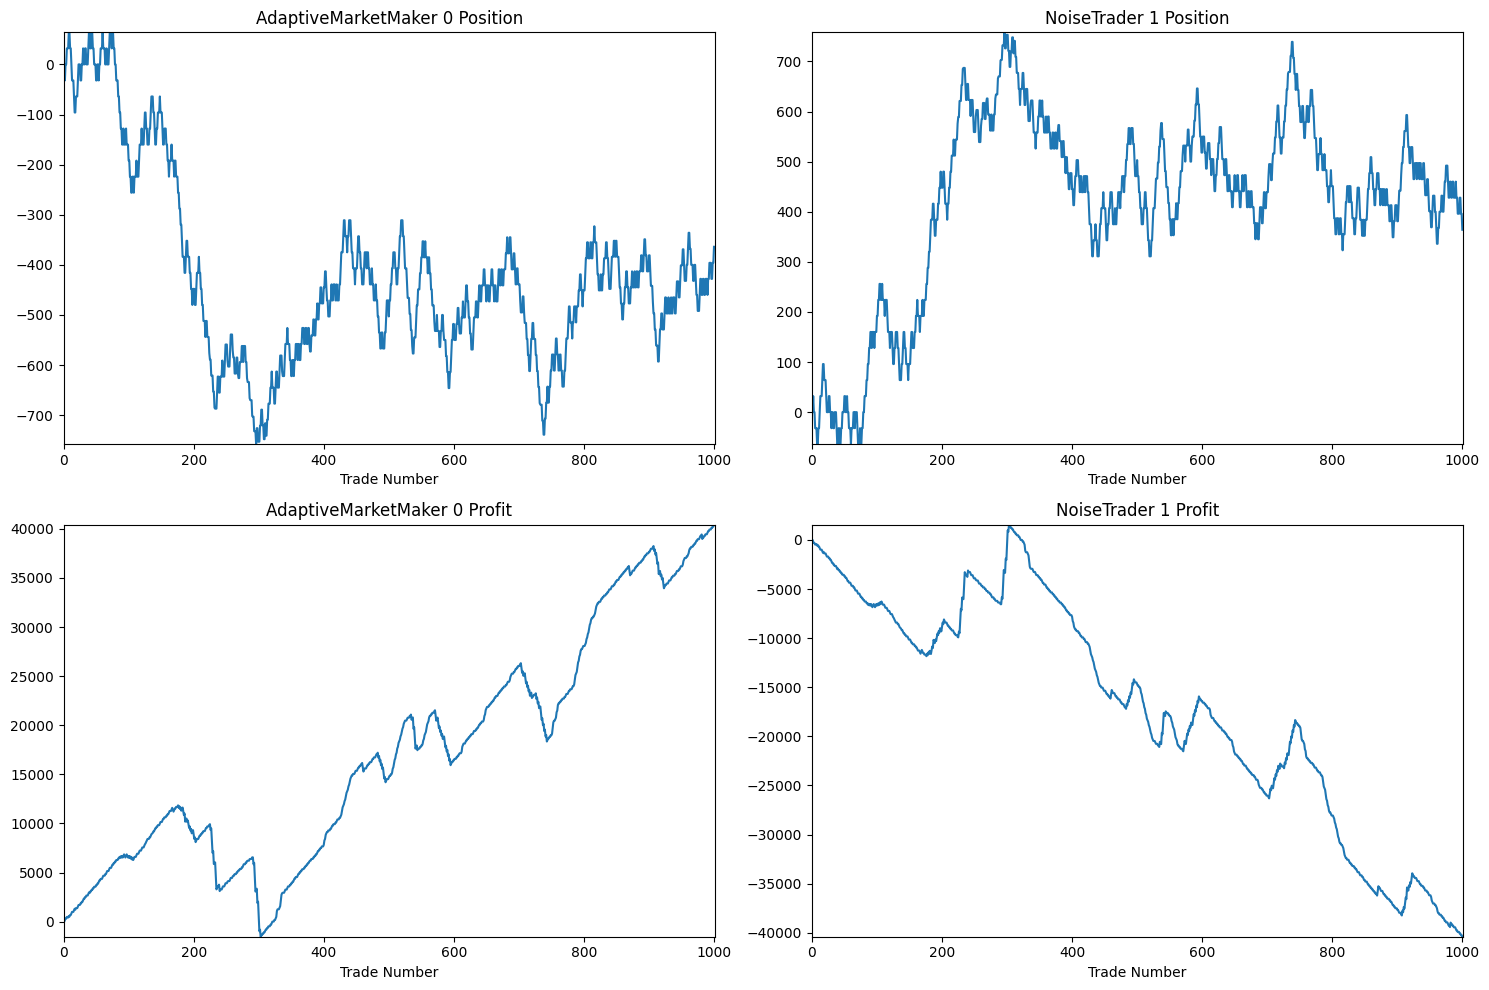

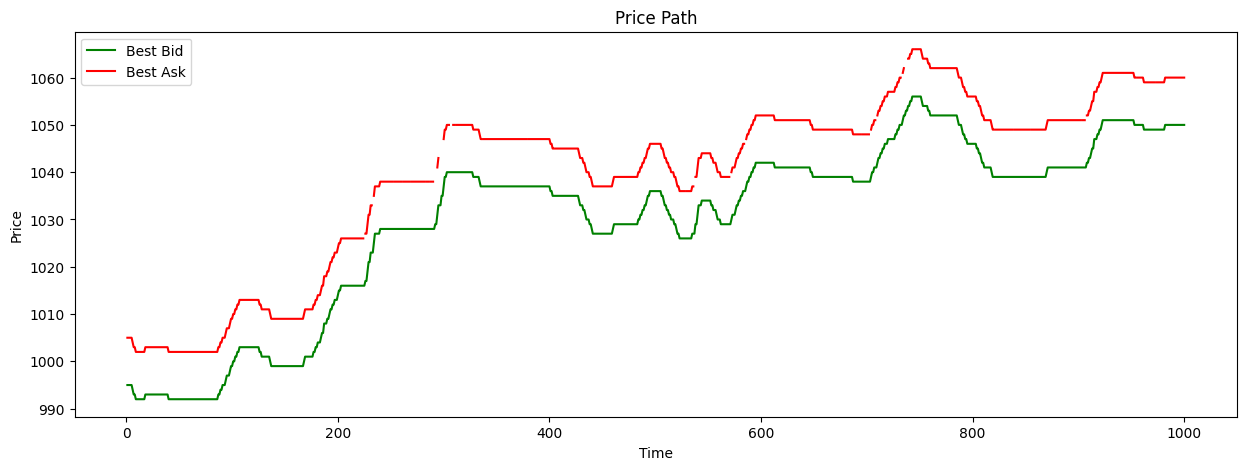

In [4]:
participant_comparison(market.participants)
price_path(market)

<Axes: >

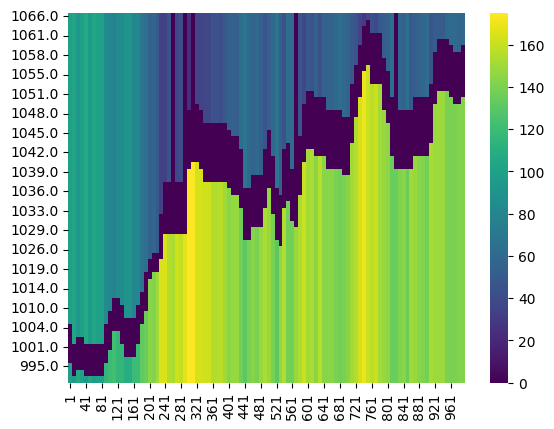

In [5]:
sns.heatmap(order_book_heatmap(market, 10), cmap='viridis')

In [6]:
participants_report(market.participants)

,AdaptiveMarketMaker_0,NoiseTrader_1
final_profit,40403.00,-40403.00
final_position,-364.00,364.00
profit_per_state,40.40,-40.40
std_profit_per_state,256.77,256.77
information_ratio,0.16,-0.16
total_trades,500.00,500.00
volume_traded,15596.00,15596.00
profit_per_volume,2.59,-2.59
average_trade_size,31.19,31.19
fill_rate,0.16,0.97


<Axes: xlabel='time'>

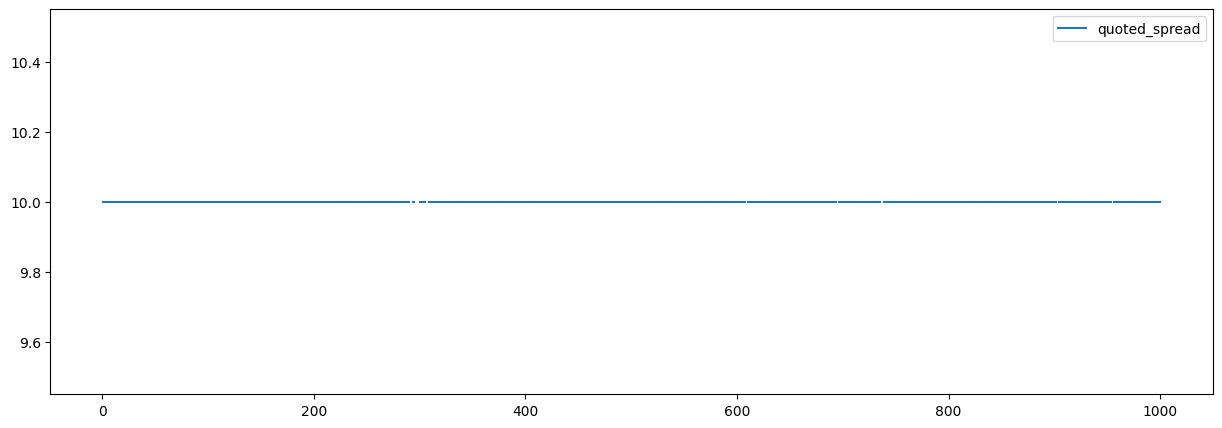

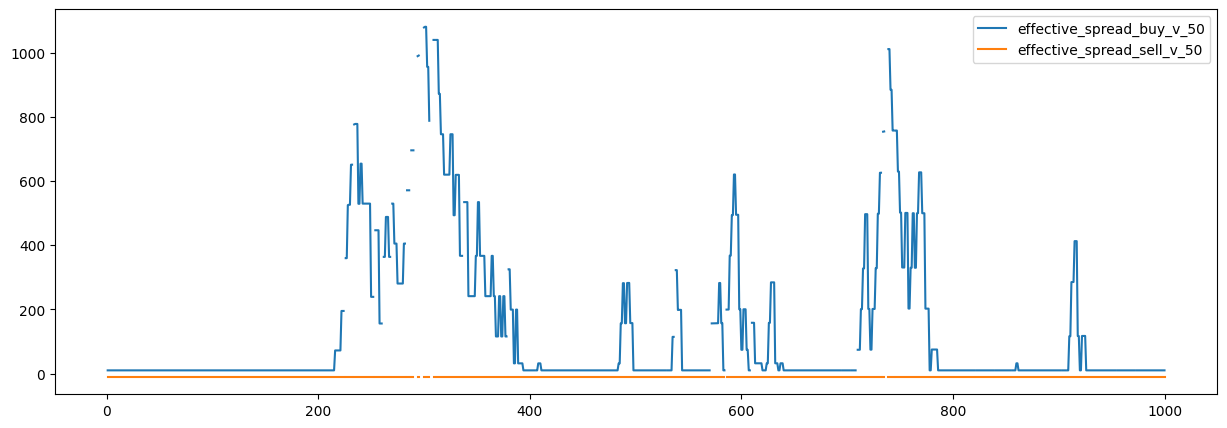

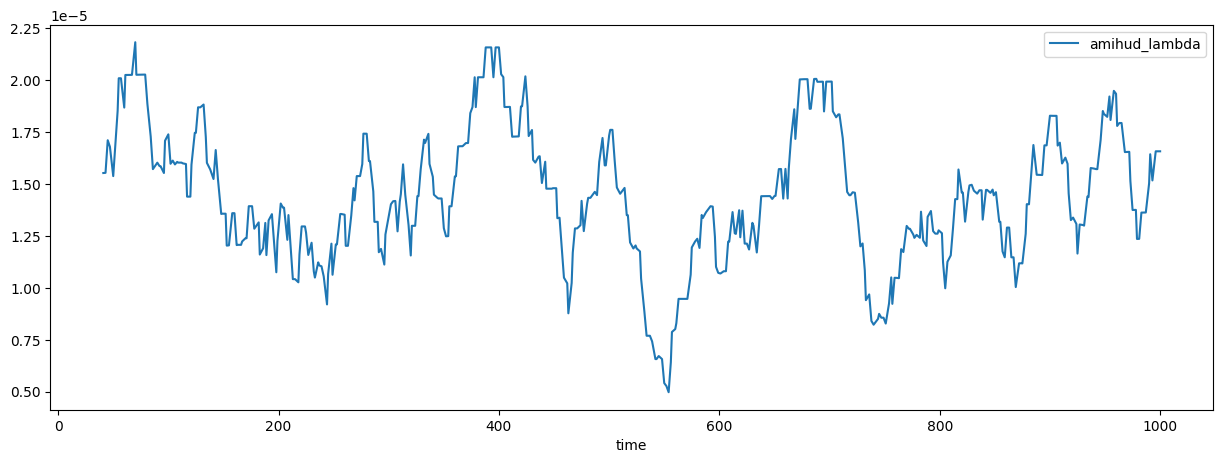

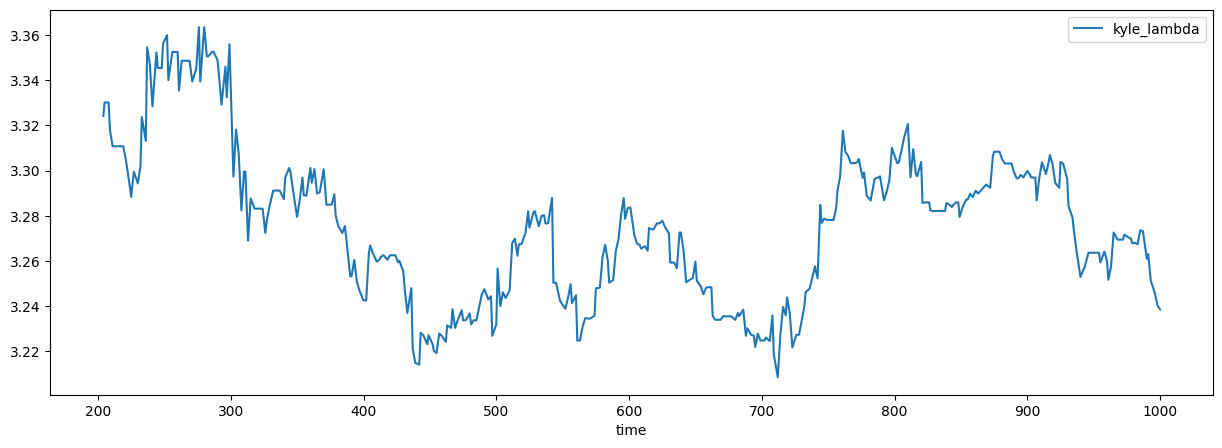

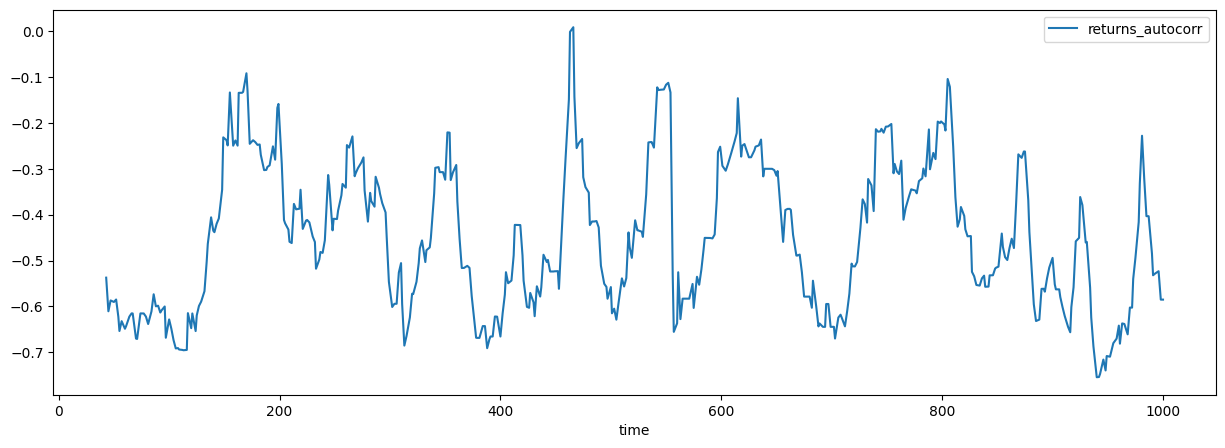

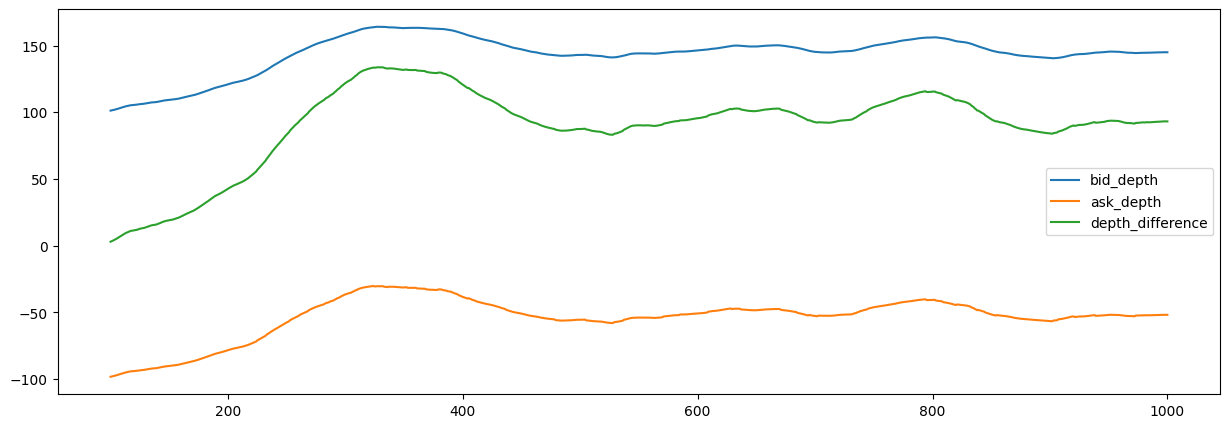

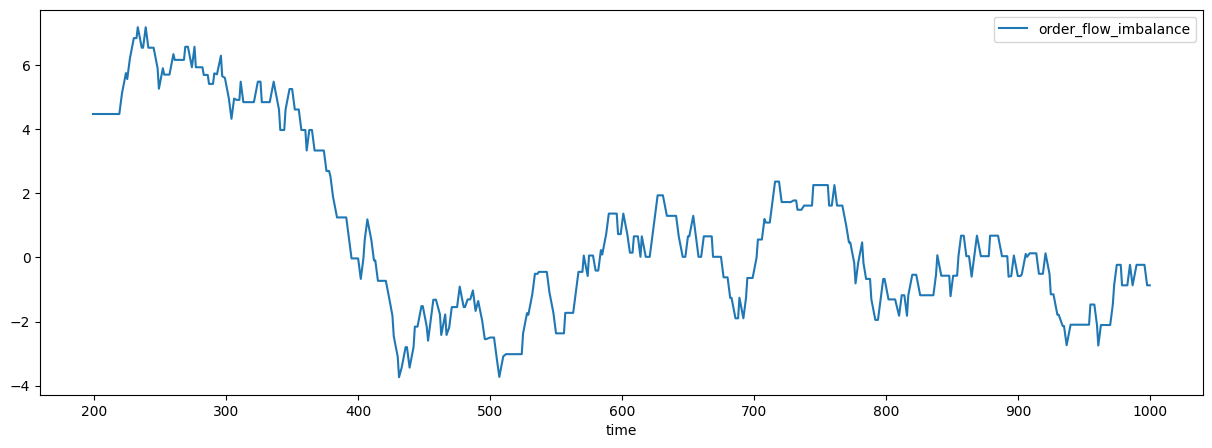

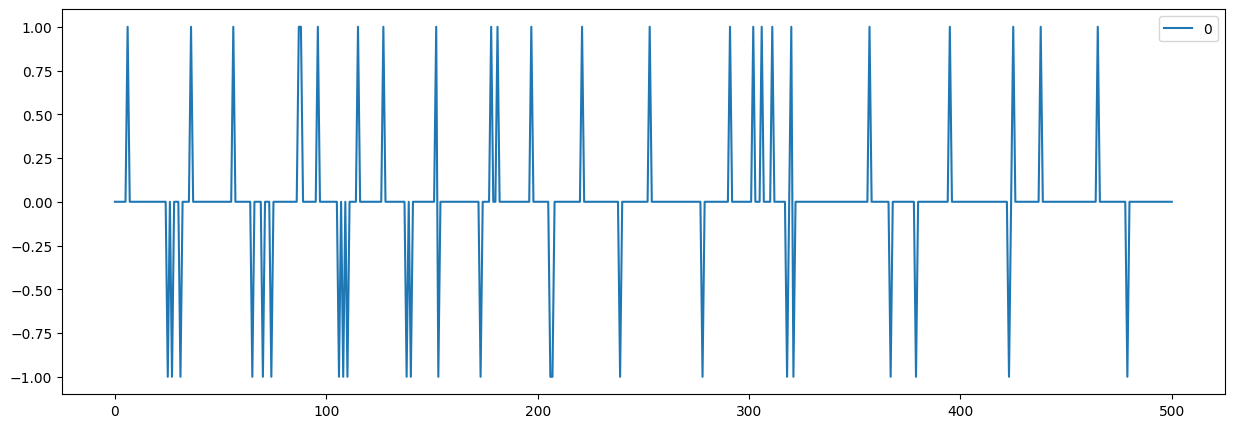

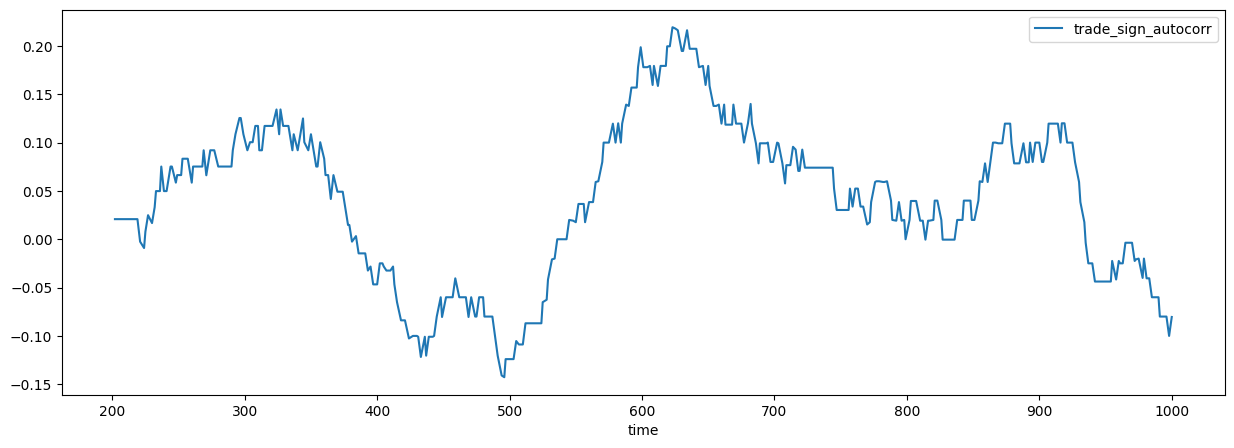

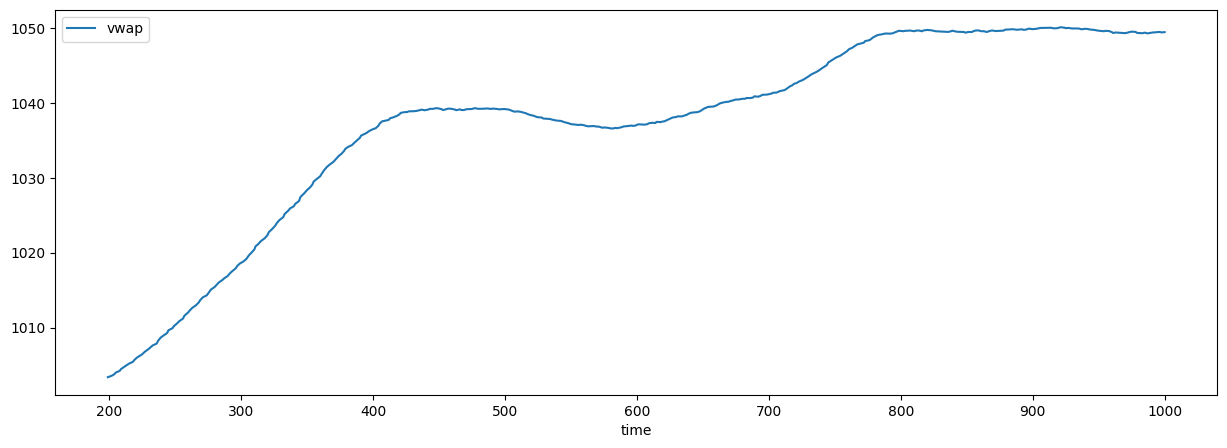

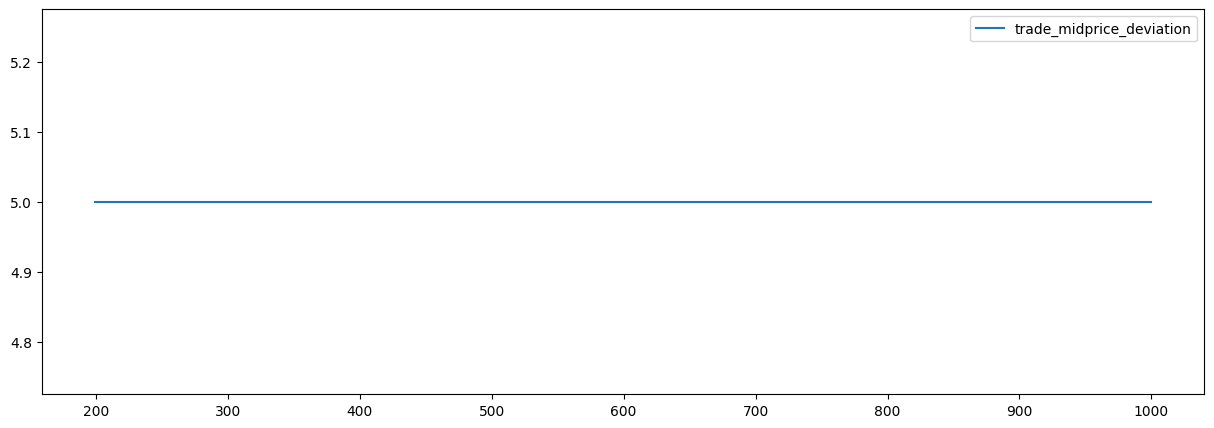

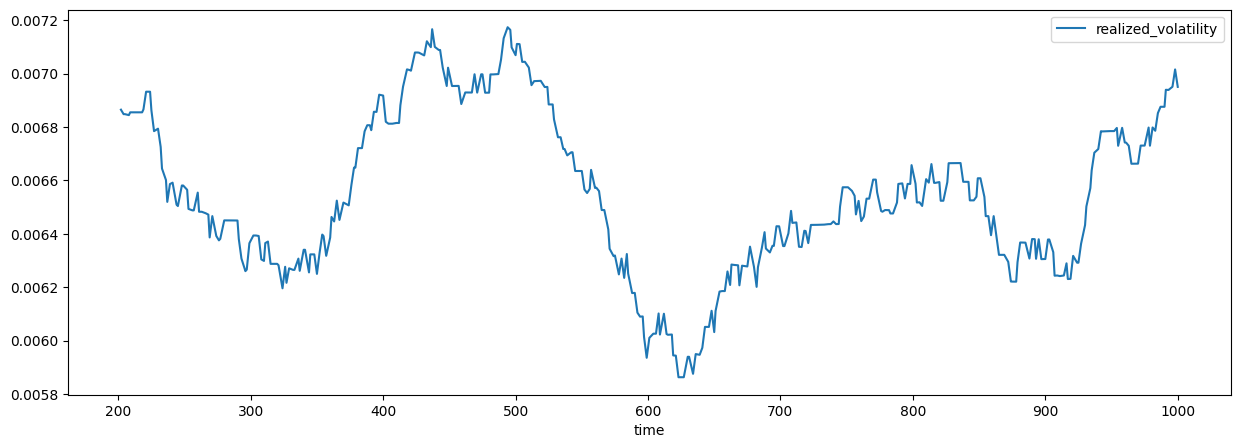

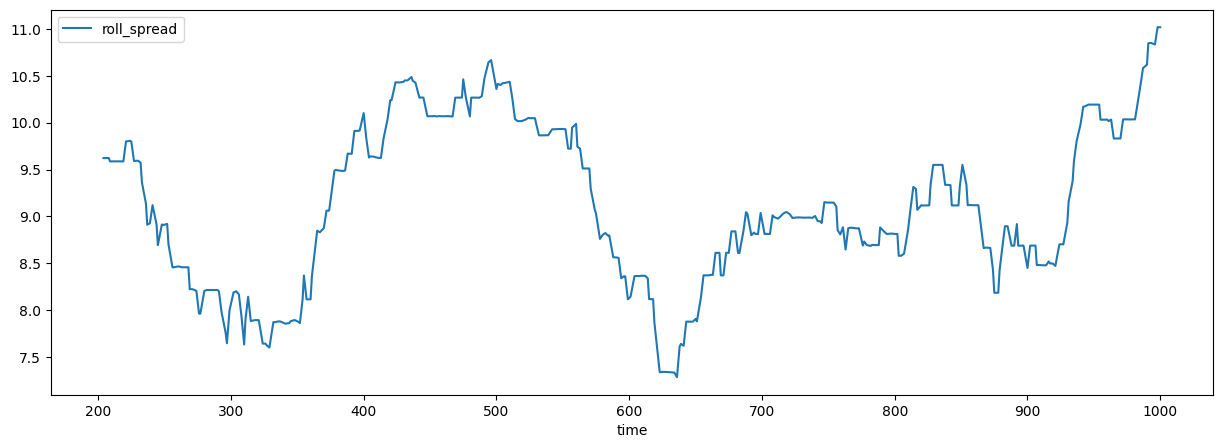

In [7]:
quoted_spread(market).plot(figsize=(15,5))
effective_spread(market, volume=50).plot(figsize=(15,5))
amihud_illiquidity(market).plot(figsize=(15,5))
kyle_lambda(market).plot(figsize=(15,5))
returns_autocorrelation(market).plot(figsize=(15,5))
order_book_depth(market).plot(figsize=(15,5))
order_flow_imbalance(market).plot(figsize=(15,5))
news_goodness(market).plot(figsize=(15,5))
trade_sign_autocorrelation(market).plot(figsize=(15,5))
vwap(market).plot(figsize=(15,5))
trade_midprice_deviation(market).plot(figsize=(15,5))
realized_volatility(market).plot(figsize=(15,5))
roll_spread_estimator(market).plot(figsize=(15,5))

In [8]:
market.ob_snapshots[450]

{'bid': [{'price': 1027, 'volume': 140}],
 'ask': [{'price': 1037, 'volume': -59}],
 'time': 451}

In [9]:
from dill import dump, load

In [10]:
with open('market.pkl', 'wb') as f:
    dump(market, f)

In [11]:
with open('market.pkl', 'rb') as f:
    market = load(f)

In [12]:
new_market = ContinuousDoubleAuction.load('market.pkl')

In [13]:
new_market